In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')


from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

[nltk_data] Downloading package punkt to /home/abh29/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/abh29/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/abh29/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/abh29/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/abh29/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv("./Reviews.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
print(df.shape)

(568454, 10)


In [5]:
df_min = df.head(n=1000)
df_min = df_min.drop({'ProductId', 'UserId', 'ProfileName', 'Time'}, axis='columns')
print(df_min.shape)

(1000, 6)


<Axes: title={'center': 'count of reviews'}, xlabel='Score'>

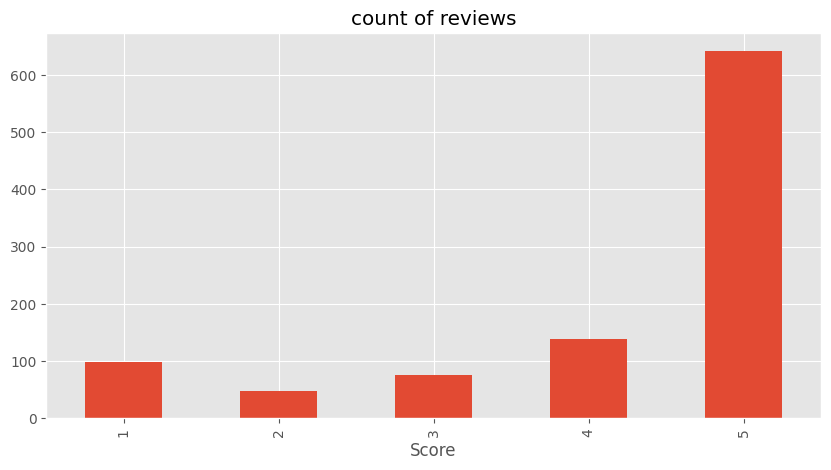

In [6]:
df_min['Score'].value_counts().sort_index().plot(kind='bar', title='count of reviews', figsize=(10, 5))

In [7]:
example = df_min['Text'][10]
print(example)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


In [8]:
tokens = nltk.word_tokenize(example)
tokens

['I',
 'do',
 "n't",
 'know',
 'if',
 'it',
 "'s",
 'the',
 'cactus',
 'or',
 'the',
 'tequila',
 'or',
 'just',
 'the',
 'unique',
 'combination',
 'of',
 'ingredients',
 ',',
 'but',
 'the',
 'flavour',
 'of',
 'this',
 'hot',
 'sauce',
 'makes',
 'it',
 'one',
 'of',
 'a',
 'kind',
 '!',
 'We',
 'picked',
 'up',
 'a',
 'bottle',
 'once',
 'on',
 'a',
 'trip',
 'we',
 'were',
 'on',
 'and',
 'brought',
 'it',
 'back',
 'home',
 'with',
 'us',
 'and',
 'were',
 'totally',
 'blown',
 'away',
 '!',
 'When',
 'we',
 'realized',
 'that',
 'we',
 'simply',
 'could',
 "n't",
 'find',
 'it',
 'anywhere',
 'in',
 'our',
 'city',
 'we',
 'were',
 'bummed.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'Now',
 ',',
 'because',
 'of',
 'the',
 'magic',
 'of',
 'the',
 'internet',
 ',',
 'we',
 'have',
 'a',
 'case',
 'of',
 'the',
 'sauce',
 'and',
 'are',
 'ecstatic',
 'because',
 'of',
 'it.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'If',
 'you',
 'love',
 'hot',
 'sauce',
 '.

In [9]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('know', 'VB'),
 ('if', 'IN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('the', 'DT'),
 ('cactus', 'NN'),
 ('or', 'CC')]

In [10]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  do/VBP
  n't/RB
  know/VB
  if/IN
  it/PRP
  's/VBZ
  the/DT
  cactus/NN
  or/CC
  the/DT
  tequila/NN
  or/CC
  just/RB
  the/DT
  unique/JJ
  combination/NN
  of/IN
  ingredients/NNS
  ,/,
  but/CC
  the/DT
  flavour/NN
  of/IN
  this/DT
  hot/JJ
  sauce/NN
  makes/VBZ
  it/PRP
  one/CD
  of/IN
  a/DT
  kind/NN
  !/.
  We/PRP
  picked/VBD
  up/RP
  a/DT
  bottle/NN
  once/RB
  on/IN
  a/DT
  trip/NN
  we/PRP
  were/VBD
  on/IN
  and/CC
  brought/VBD
  it/PRP
  back/RP
  home/NN
  with/IN
  us/PRP
  and/CC
  were/VBD
  totally/RB
  blown/VBN
  away/RB
  !/.
  When/WRB
  we/PRP
  realized/VBD
  that/IN
  we/PRP
  simply/RB
  could/MD
  n't/RB
  find/VB
  it/PRP
  anywhere/RB
  in/IN
  our/PRP$
  city/NN
  we/PRP
  were/VBD
  bummed./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Now/RB
  ,/,
  because/IN
  of/IN
  the/DT
  magic/NN
  of/IN
  the/DT
  internet/NN
  ,/,
  we/PRP
  have/VBP
  a/DT
  case/NN
  of/IN
  the/DT
  sauce/NN
  and/CC
  are/VBP


# Vaders

In [11]:
## sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

In [12]:
## example of the polarity scores 
sia.polarity_scores('good enough')

{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}

In [13]:
res = {}
for i, row in tqdm(df_min.iterrows(), total=len(df_min)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [14]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df_min, how='left')
vaders

,Id,neg,neu,pos,compound,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,0.000,0.695,0.305,0.9441,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0,0,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,0.026,0.721,0.253,0.9788,1,1,5,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,0.000,0.786,0.214,0.9309,1,1,5,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,0.000,0.673,0.327,0.9634,1,1,5,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,0.063,0.874,0.062,-0.0129,1,2,1,Not Hot,Not hot at all. Like the other low star review...


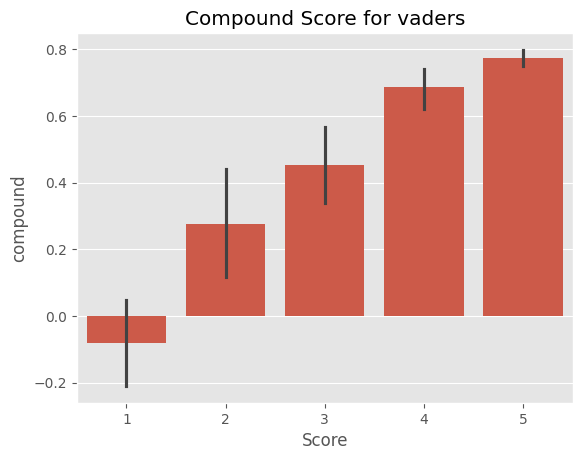

In [15]:
#plot the vader results
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title("Compound Score for vaders")
plt.show()

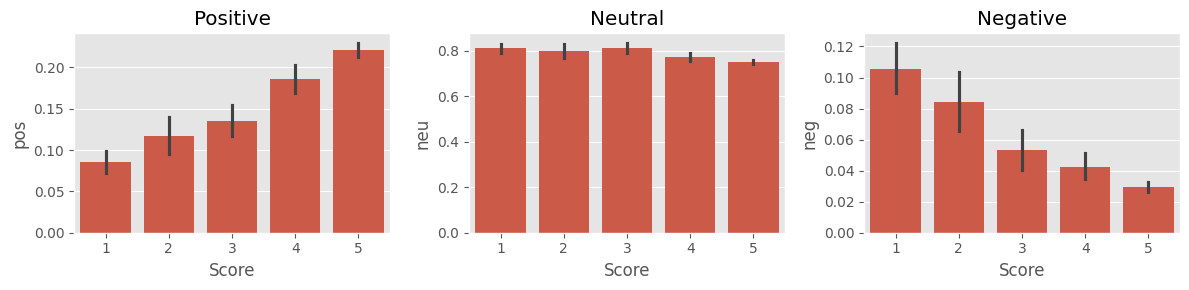

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Roberta Pretrained Model

In [17]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [18]:
model_name = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [19]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.01913413, 0.0710445 , 0.9098214 ], dtype=float32)

In [22]:
res2 = {}
for i, row in tqdm(df_min.iterrows(), total=len(df_min)):
    try:
        text = row['Text']
        myid = row['Id']
        encoded_text = tokenizer(text, return_tensors='pt')
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        res2[myid] = {
            'rob_neg' : scores[0],
            'rob_neu' : scores[1],
            'rob_pos' : scores[2]
        }
    except RuntimeError:
        print(f"line {myid} is too long for the model")
res2

  0%|          | 0/1000 [00:00<?, ?it/s]

line 83 is too long for the model
line 187 is too long for the model
line 529 is too long for the model
line 540 is too long for the model
line 746 is too long for the model
line 863 is too long for the model


{1: {'rob_neg': 0.009624217, 'rob_neu': 0.049980354, 'rob_pos': 0.94039536},
 2: {'rob_neg': 0.508986, 'rob_neu': 0.4524136, 'rob_pos': 0.038600393},
 3: {'rob_neg': 0.003228901, 'rob_neu': 0.0980675, 'rob_pos': 0.8987036},
 4: {'rob_neg': 0.0022951285, 'rob_neu': 0.09021916, 'rob_pos': 0.90748566},
 5: {'rob_neg': 0.0016347283, 'rob_neu': 0.0103024645, 'rob_pos': 0.98806286},
 6: {'rob_neg': 0.0061295927, 'rob_neu': 0.021795873, 'rob_pos': 0.97207457},
 7: {'rob_neg': 0.0013047527, 'rob_neu': 0.007773787, 'rob_pos': 0.99092144},
 8: {'rob_neg': 0.002029358, 'rob_neu': 0.005685204, 'rob_pos': 0.9922854},
 9: {'rob_neg': 0.0038735769, 'rob_neu': 0.09415625, 'rob_pos': 0.9019702},
 10: {'rob_neg': 0.0031034583, 'rob_neu': 0.05591222, 'rob_pos': 0.9409843},
 11: {'rob_neg': 0.019134127, 'rob_neu': 0.0710445, 'rob_pos': 0.9098214},
 12: {'rob_neg': 0.37264353, 'rob_neu': 0.51969886, 'rob_pos': 0.107657656},
 13: {'rob_neg': 0.46612483, 'rob_neu': 0.41525918, 'rob_pos': 0.11861606},
 14: {'

In [23]:
roberta = pd.DataFrame(res2).T
roberta = roberta.reset_index().rename(columns={'index':'Id'})
roberta = roberta.merge(vaders, how='left')
roberta

,Id,rob_neg,rob_neu,rob_pos,neg,neu,pos,compound,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,0.009624,0.049980,0.940395,0.000,0.695,0.305,0.9441,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.508986,0.452414,0.038600,0.138,0.862,0.000,-0.5664,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.003229,0.098067,0.898704,0.091,0.754,0.155,0.8265,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.002295,0.090219,0.907486,0.000,1.000,0.000,0.0000,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.001635,0.010302,0.988063,0.000,0.552,0.448,0.9468,0,0,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,996,0.001335,0.006112,0.992553,0.026,0.721,0.253,0.9788,1,1,5,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
990,997,0.002649,0.016077,0.981274,0.000,0.786,0.214,0.9309,1,1,5,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
991,998,0.001362,0.011372,0.987266,0.000,0.673,0.327,0.9634,1,1,5,this sauce is the shiznit,this sauce is so good with just about anything...
992,999,0.661606,0.293687,0.044707,0.063,0.874,0.062,-0.0129,1,2,1,Not Hot,Not hot at all. Like the other low star review...


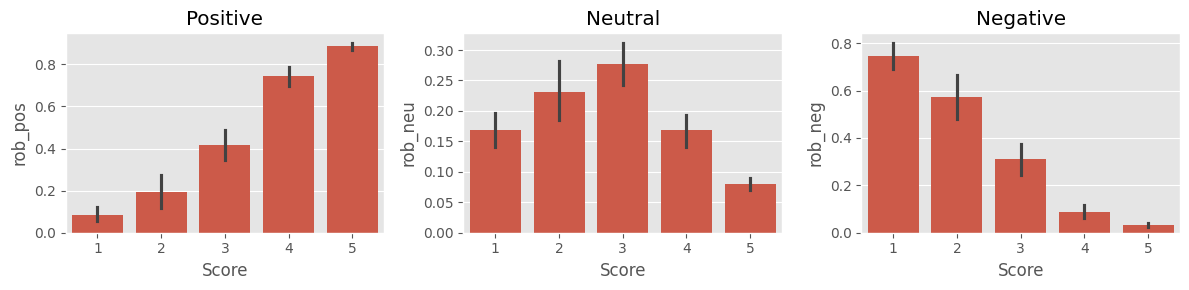

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(data=roberta, x='Score', y='rob_pos', ax=axs[0])
sns.barplot(data=roberta, x='Score', y='rob_neu', ax=axs[1])
sns.barplot(data=roberta, x='Score', y='rob_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [25]:
roberta.columns

Index(['Id', 'rob_neg', 'rob_neu', 'rob_pos', 'neg', 'neu', 'pos', 'compound',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Summary',
       'Text'],
      dtype='object')

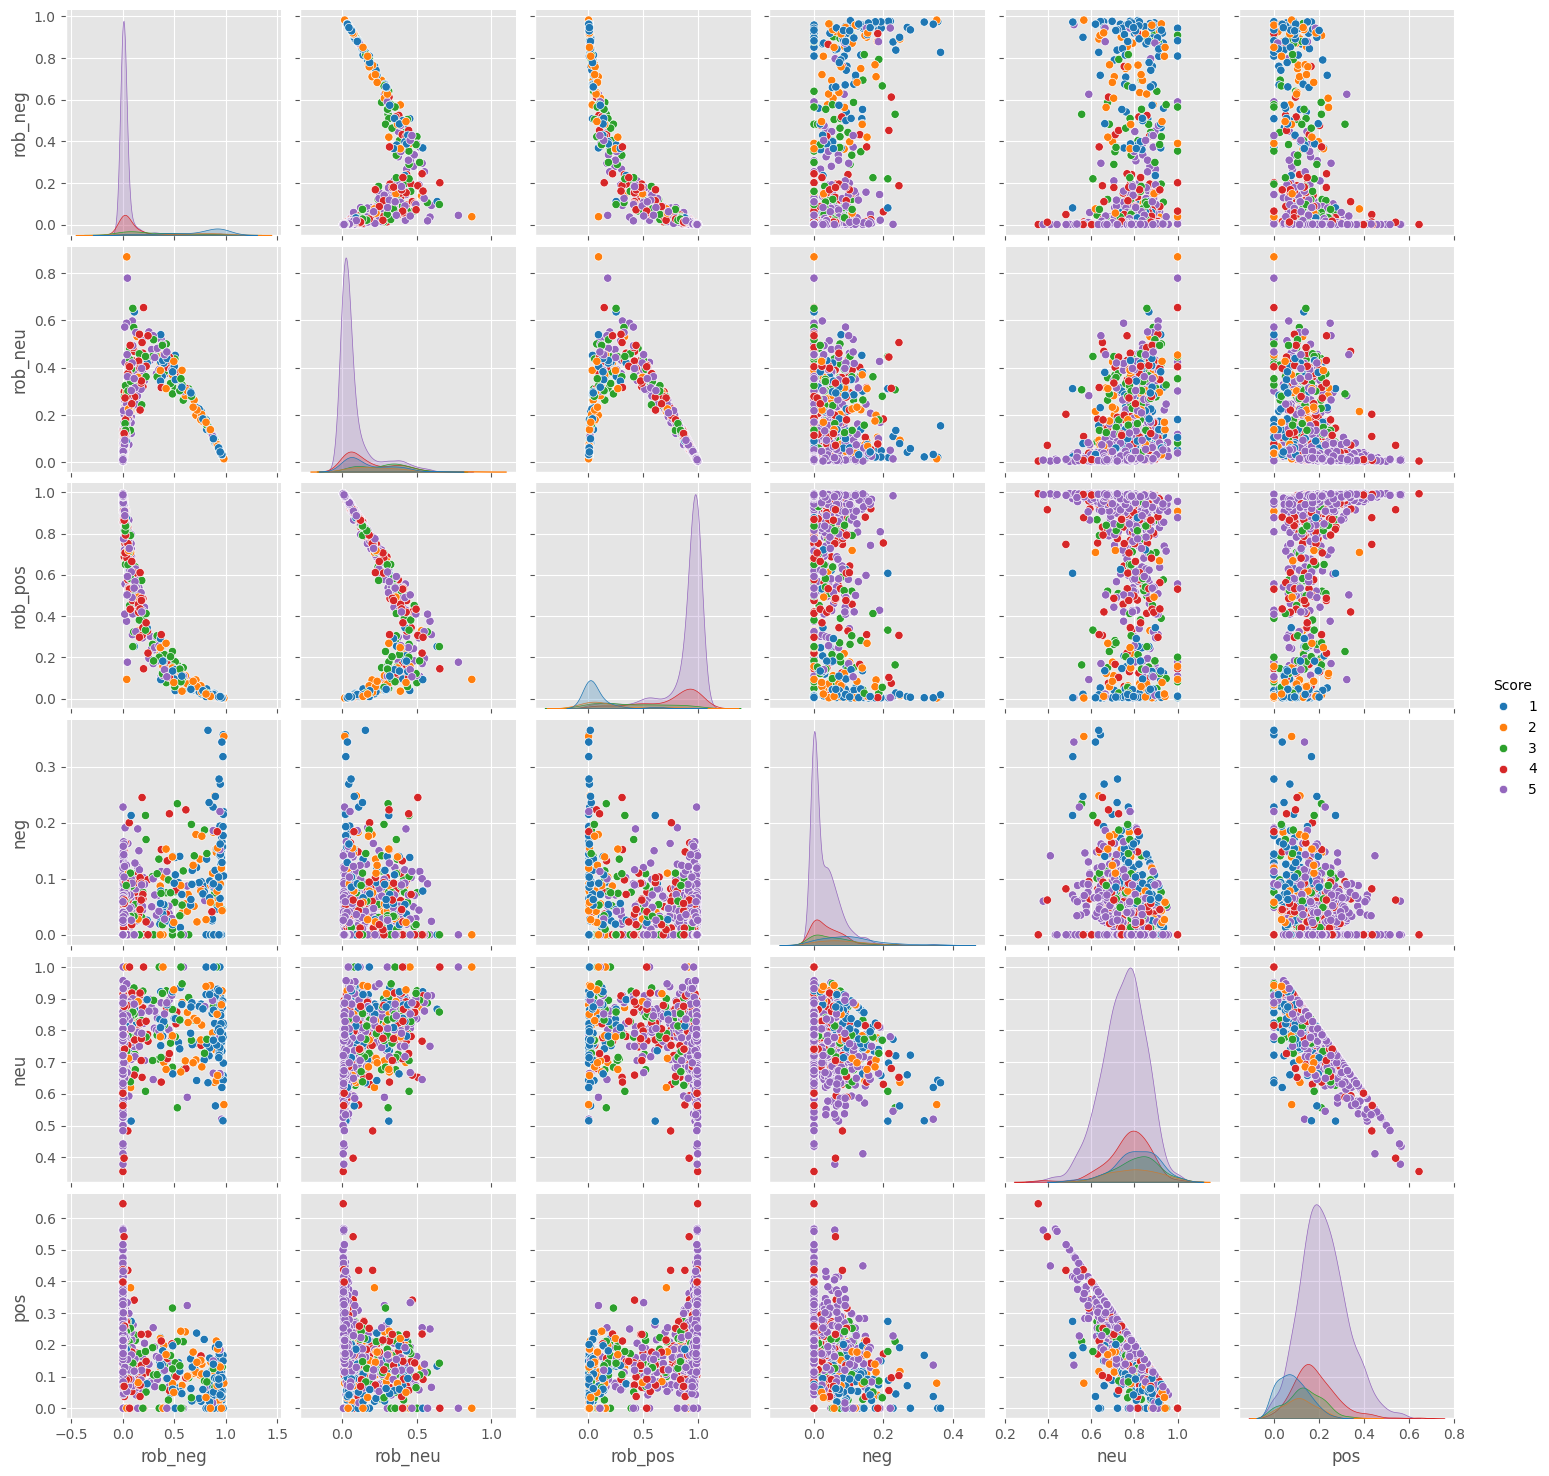

In [26]:
 sns.pairplot(data=roberta, vars=['rob_neg', 'rob_neu', 'rob_pos', 'neg', 'neu', 'pos'],
             hue='Score', palette='tab10')
plt.show()

# Some false positives

In [27]:
roberta.query('Score == 1').sort_values('rob_pos', ascending=False)['Text'].values[:3]

array(["I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months.",
       'If it were possible to give this product zero stars, I would have done so.  I am a huge fan of Twinings teas, and was very excited to try this new blend.  After arriving home from the grocery, I immediately started the kettle to enjoy a cup while prepping dinner.  Between sorting, washing, and chopping items, the hot water was added to the bag to steep.  Preparation continued, until a distinctly off odor hit me.  I thought one of my ingredients must be rancid!  I hunted around for almost four minutes before I realized it was the tea.  Even after cleaning up, and airing out the kitchen, my roommate later came in and asked about 

In [28]:
vaders.query('Score == 1').sort_values('pos', ascending=False)['Text'].values[:3]

array(['So we cancelled the order.  It was cancelled without any problem.  That is a positive note...',
       'Kettle chips now look, feel and taste like Lays.  These chips used to be my favorite when it was crinkle cut and hefty.  Now, no longer my favorite.',
       'Seriously this product was as tasteless as they come. There are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. You just have to season it or combine it with something else to share the flavor.'],
      dtype=object)

# some false negatives

In [29]:
roberta.query('Score == 5').sort_values('rob_neg', ascending=False)['Text'].values[:3]

array(['this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault',
       "If this flavor lasted longer than it does, I'd probably die of starvation for lack of wanting to take it out of my mouth.",
       "this gum is super sick.tatooes are killin.flavor is a spankin'.this brings back bomb diggity memories yo.peace out."],
      dtype=object)

In [30]:
vaders.query('Score == 5').sort_values('neg', ascending=False)['Text'].values[:3]

array(['this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault',
       'I love using this to sweeten tea, coffee, etc. It tastes much better than other low glycemic sweeteners - there is no bitter aftertaste.',
       "If this flavor lasted longer than it does, I'd probably die of starvation for lack of wanting to take it out of my mouth."],
      dtype=object)

# trying  Transformers Pipeline

In [33]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [34]:
sent_pipeline("i like this depite it being in python")

[{'label': 'NEGATIVE', 'score': 0.9912219047546387}]